<a href="https://colab.research.google.com/github/EdoardoZappia/Probabilist-Machine-Learning/blob/main/01_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/DavideScassola/PML2024/blob/main/./Homeworks/01_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Homework 1

Probabilistic Machine Learning -- Spring 2024, UniTS

### Problem 1

Let's call $S$ the Bernoulli random variable describing the presence of a certain substance ($S=1$: present, $S=0$: not present) and $T$ the Bernoulli random variable describing the result of the test for detecting that substance ($T=1$: positive, $T=0$: negative).

Given:
- $P(T=1 | S=1) = 1 - 10^{-4}$
- $P(T=1 | S=0) = 10^{-3}$
- $P(S = 1) = 10^{-4}$

1. Compute the normalized mutual information between $S$ and $T$, that is defined as follows:
$$\text{NMI}[S,T] = \frac{2 \cdot \text{I}[S,T]}{\text{H}[A] + \text{H}[B]}$$

where $\text{I}$ indicates the mutual information, and $\text{H}$ indicates the entropy

2. Let's suppose one can repeat the same test $n$ times, and the result of each test will be independent (conditionally given $S$). What is the minimum number of tests $n$ such that the probability of having a false positive after getting $n$ positive tests is less than $10^{-6}$ ?

Solution:

S and T are discrete random variables, so the entropy is defined as $$H[p]=-\sum_ip(x_i)\log p(x_i)$$
The mutual information is defined as $$I[x,y]=KL[p(x,y)||p(x)p(y)]$$

In [ ]:
import numpy as np

P_T1_given_S1 = 1 - 10**-4  # P(T = 1 | S = 1)
P_T1_given_S0 = 10**-3     # P(T = 1 | S = 0)
P_S1 = 10**-4             # P(S = 1)
P_S0 = 1 - P_S1                               # P(S = 0)
P_T1 = P_T1_given_S1 * P_S1 + P_T1_given_S0 * P_S0 # P(T = 1)
P_T0_given_S1 = 1 - P_T1_given_S1              # P(T = 0 | S = 1)
P_T0_given_S0 = 1 - P_T1_given_S0              # P(T = 0 | S = 0)
P_T0 = 1 - P_T1                               # P(T = 0)

P_S1T1 = P_T1_given_S1 * P_S1   # P(S=1, T=1)
P_S1T0 = P_T0_given_S1 * P_S1  # P(S=1, T=0)
P_S0T1 = P_T1_given_S0 * P_S0   # P(S=0, T=1)
P_S0T0 = P_T0_given_S0 * P_S0  # P(S=0, T=0)

# Entropy of S
H_S = - (P_S1 * np.log2(P_S1) + P_S0 * np.log2(P_S0))

# Entropy of T
H_T = - (P_T1 * np.log2(P_T1) + P_T0 * np.log2(P_T0))

# Mutual information
I_ST = (P_S1T1 * np.log2(P_S1T1 / (P_S1 * P_T1)) +
        P_S1T0 * np.log2(P_S1T0 / (P_S1 * P_T0)) +
        P_S0T1 * np.log2(P_S0T1 / (P_S0 * P_T1)) +
        P_S0T0 * np.log2(P_S0T0 / (P_S0 * P_T0)))

# Normalized mutual information
NMI = 2 * I_ST / (H_S + H_T)

print(f"The Normalized Mutual Information (NMI) is: {NMI}")

The Normalized Mutual Information (NMI) is: 0.14266985665645654


Given that the results of each test are independent, the probability of having n false positive tests is $$P(T=1|S=0)^n$$
Given that $$P(T=1|S=0)=10^{-3}$$
We want $P(T=1|S=0)^n<10^{-6}$ so $$n\log10^{-3} < \log 10^{-6} $$ $$n > \frac{-6}{-3}$$ $$ n > 2$$ So we have to take at least 3 tests.

### Problem 2

It's night and you are looking into the sky waiting to see a falling star. After the first hour you still haven't seen anything, so you check online and find two sources $s_1$ and $s_2$. According to $s_1$ the waiting time is distributed as $p_1(t) = 2e^{-2t}$, according to $s_2$ it's $p_2(t) = 0.3e^{-0.3t}$.

Assuming (only) one of the two is correct and that at first you don't trust one more than the other ( $P(s_1 \text{ is correct}) = P(s_2 \text{ is correct}) = 0.5$ ):
- Which one of the two sources do you believe more after the first hour? Can you quantify it?
- What is the probability of seeing the first falling star in the next 1 hour?

Solution:

The probability to observe a falling star in the first hour, given that the first source is correct is $(s_1=1)$
$$p(t \le 1 | s_1=1) = \int_0^12e^{-2t}dt \sim 0.86$$
The probability to observe a falling star in the first hour, given that the second source is correct is $(s_2=1)$
$$p(t \le 1 | s_2=1) = \int_0^10.3e^{-0.3t}dt \sim 0.26$$
So it seems more probable to be correct the second source, given the fact that I didn't see a falling star in the first our.

The probability of observe a falling star between the first and the second hour is the same as the probability of observe it in the first hour because of the absence of memory of the distributions examined. Let's prove it:

$$p(t \lt 2 | t\gt 1 \cap s_1=1)=\frac{p(t \lt 2 \cap t\gt 1 \cap s_1=1)}{p(t \gt 1  \cap s_1=1)}=\frac{p(1 \lt t \lt 2 \cap s_1=1)}{p(t \gt 1  \cap s_1=1)}
= \frac{\int_1^22e^{-2t}dt}{\int_1^\infty2e^{-2t}dt} \sim 0.86$$

$$p(t \lt 2 | t\gt 1 \cap s_2=1)=\frac{p(t \lt 2 \cap t\gt 1 \cap s_2=1)}{p(t \gt 1  \cap s_2=1)}=\frac{p(1 \lt t \lt 2 \cap s_2=1)}{p(t \gt 1  \cap s_2=1)}
= \frac{\int_1^20.3e^{-0.3t}dt}{\int_1^\infty0.3e^{-0.3t}dt} \sim 0.26$$

Given the absence of memory and because we don't know which model it's true, the probability of seeing the first falling star in the next 1 hour is the sum of the quantity just computed weighted on the corresponding probability of the model being true:

$$P(t \le 1| s_1=1)P(s_1=1)+P(t \le 1| s_2=1)P(s_2=1)=0.562 $$

### Problem 3

You enrolled to a small tennis tournament organized by your university, that has only other three participants: let's call them $A$, $B$ and $C$.
Your first match will be against $A$, and it's scheduled after the match between $A$ and $B$ and the match between $B$ and $C$.

Assuming the result of a match $M \in \{0,1\}$ between two players $X$ and $Y$ ($M=1$ means $X$ won, $M=0$ means $Y$ won) is described by the following model:

$$M \sim Bern(p)$$

where $p = f(2(S_x - S_y))$ with $f(k) = \frac{1}{1 + e^{-k}}$ and

$$S_i \sim \mathcal{N}(0,1)$$

is the "latent" skill of player $i$ (always the same for every match that player $i$ plays)

1. Show a bayesian network describing the relationship between all the involved random variables.
2. Make a model in pyro describing the stochastic process.
3. Estimate by simulation the probability of (you) winninng against $A$, given that $A$ won against $B$ and $B$ won against $C$. Use exactly 30000 samples and call `set_seed()` before sampling.


Solution:

1_ $$\begin{matrix}
  S_A & S_B & S_C \\
  | & | & | \\
  A &→ B &→ C
\end{matrix}$$

2_

In [ ]:
#!pip install pyro-ppl

In [ ]:
import random
import numpy as np
import pandas as pd
import torch
import pyro
import pyro.distributions as dist
import seaborn as sns

def set_seed():
    seed = 0
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)

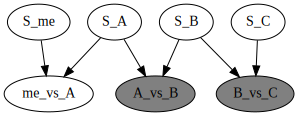

In [ ]:
def funct(k):
    return 1/(1+np.exp(-k))

# Define the model
def tennis_model(n : int = 1, obs1=None, obs2=None):
    # Latent skill levels of players
    S_A = pyro.sample("S_A", dist.Normal(0, 1))
    S_B = pyro.sample("S_B", dist.Normal(0, 1))
    S_C = pyro.sample("S_C", dist.Normal(0, 1))
    S_me = pyro.sample("S_me", dist.Normal(0, 1))

    # Compute match outcomes
    p_A_vs_B = funct(2*(S_A-S_B))
    A_vs_B = pyro.sample("A_vs_B", dist.Bernoulli(p_A_vs_B), sample_shape=(n,), obs=obs1)

    p_B_vs_C = funct(2*(S_B-S_C))
    B_vs_C = pyro.sample("B_vs_C", dist.Bernoulli(p_B_vs_C), sample_shape=(n,), obs=obs2)

    # Infer the outcome of your match against A based on outcomes of previous matches
    p_me_vs_A = funct(2*(S_me-S_A))
    me_vs_A = pyro.sample("me_vs_A", dist.Bernoulli(p_me_vs_A), sample_shape=(n,))

    return {
        "A_vs_B": A_vs_B,
        "B_vs_C": B_vs_C,
        "me_vs_A": me_vs_A
    }

pyro.render_model(tennis_model, model_args=(1, torch.tensor(1.0), torch.tensor(1.0)))

3_

In [ ]:
# Run the model
set_seed()
samples = tennis_model(30_000)
df_samples = pd.DataFrame({key: value.numpy() for key, value in samples.items()})
# Count the number of times you win against A given A won against B and B won against C
win_count = ((df_samples["me_vs_A"] == 1) & (df_samples["A_vs_B"] == 1) & (df_samples["B_vs_C"] == 1)).sum()
# Calculate the probability of winning against A
probability = win_count / len(df_samples)
print("Probability of winning against A:", probability)

Probability of winning against A: 0.1201


### Problem 4

Given a list of $n$ random variables $X_1, X_2, \ldots, X_n$ such that:
$$\forall{i}, \ p(x_{i+2} | x_{i+1}, x_{i}) = p(x_{i+2} | x_{i+1})$$

prove:
$$\forall{i}, \ p(x_{i-2} | x_{i-1}, x_{i}) = p(x_{i-2} | x_{i-1})$$

Solution:

$$\forall i \quad p(x_{i+2}|x_{x+1},x_{i})=p(x_{i+2}|x_{x+1}) \quad \Rightarrow \quad \forall i \quad x_{i+2} \perp x_{i}|x_{x+1}\\
p(x_{i-2}|x_{i-1},x_{i})=\frac{p(x_{i-2},x_{i-1},x_{i})}{p(x_{i-1},x_{i})}=\frac{p(x_{i},x_{i-2}|x_{i-1})p(x_{i-1})}{p(x_{i}|x_{i-1})p(x_{i-1})}=\\
=\frac{p(x_{i},x_{i-2}|x_{i-1})}{p(x_{i}|x_{i-1})} \quad x_{i}\perp x_{i-2}|x_{i-1} \quad \Rightarrow \quad =\frac{p(x_{i}|x_{i-1})p(x_{i-2}|x_{i-1})}{p(x_{i}|x_{i-1})}=p(x_{i-2}|x_{i-1})
$$

### Problem 5

A chocolate easter egg contains 1 of $N$ possible different surprises. Assuming all surprises are equally probable, how many eggs do you expect you have to buy if you want to collect all $N$ possible surprises?

Finally, compute it for $N=100$ (using python)

Solution: \\

$$N\sum_{i=1}^N\frac{1}{i}$$

In [ ]:
def expected_eggs_to_collect_all(N):
    expected_eggs = N * sum(1 / i for i in range(1, N + 1))
    return expected_eggs

N = 100
expected_eggs = expected_eggs_to_collect_all(N)
print("Expected number of eggs to collect all", N, "possible surprises:", expected_eggs)


Expected number of eggs to collect all 100 possible surprises: 518.737751763962


So the minimum number of eggs to open is 519

### Problem 6

In the notebook “Exact inference with Belief Propagation”, we implemented the forward pass of the sum-product algorithm in order to compute the marginal distribution of a variable.  
1. Add to the class “Messages” a method “forward” which computes the forward pass without calculating the marginal distribution of a given variable
2. Add to the class “Messages” a method “backward” which computes the backward pass
3. Add to the class “Messages” a method “belief_propagation” which executes first the forward pass and then the backward pass and uses the messages to compute  all the marginals. Return a dictionary containing the variable names and the corresponding marginals.
4. Use this method to compute the marginals of the variables of the factor graph described on page 43 of the notes of the course.

For this exercise, please submit the notebook 04_exact_inference.ipybn with your additional code.

Solution in another file